In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from time_series_gpt.models.Monte_Carlo.prophet import ProphetMeta
from data_loading_finance.loading_data import LoadingData
from ts_tools.tools import tools

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[*********************100%%**********************]  1 of 1 completed


Getting info for ticker IBM...


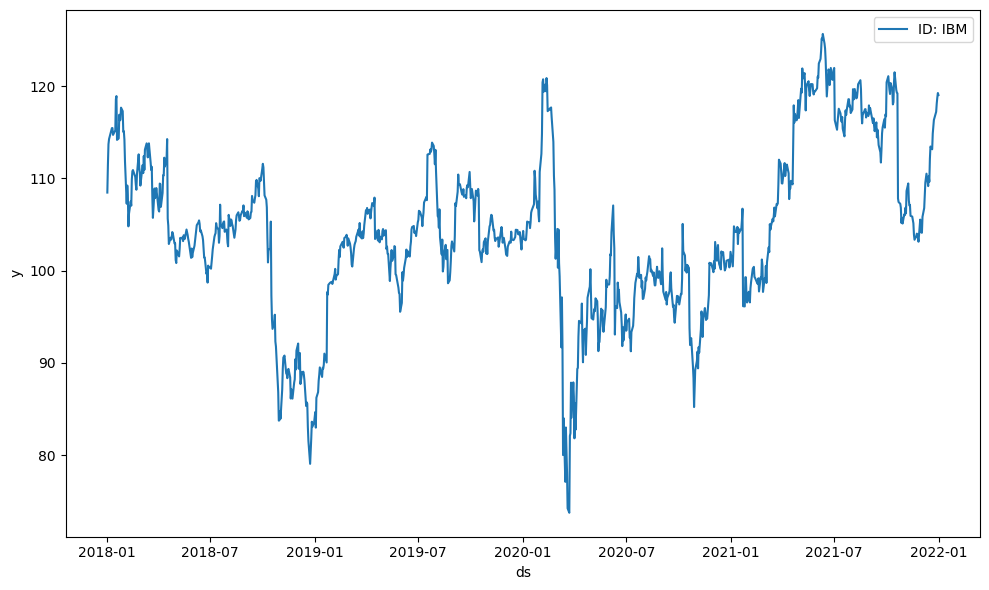

,unique_id,ds,y
0,IBM,2021-12-31,119.041321
1,IBM,2021-12-30,119.263985
2,IBM,2021-12-29,118.765221
3,IBM,2021-12-28,118.123962
4,IBM,2021-12-27,117.224434
...,...,...,...
1003,IBM,2018-01-08,114.954552
1004,IBM,2018-01-05,114.265388
1005,IBM,2018-01-04,113.709862
1006,IBM,2018-01-03,111.452553


In [2]:
# Load the data
tickers = ['IBM']
loader = LoadingData(tickers=tickers)
ts = loader.get_data(start_date='2018-01-01', end_date='2022-01-01')
info = loader.get_info_ticker()

ts_tools = tools()
ts = ts_tools.ts_prepartion(ts, 'Date', 'Adj Close')
ts_tools.plot_ts(ts)

In [3]:
prophet = False

horizon= 30
freq= 'D'

model = ProphetMeta (ts_data=ts)
model.train_and_evaluate()
ts_forecast = model.predict(horizon=horizon, freq=freq)
result_metric = model.get_results()

Processing IBM...


11:41:58 - cmdstanpy - INFO - Chain [1] start processing
11:41:59 - cmdstanpy - INFO - Chain [1] done processing
11:41:59 - cmdstanpy - INFO - Chain [1] start processing
11:41:59 - cmdstanpy - INFO - Chain [1] start processing
11:41:59 - cmdstanpy - INFO - Chain [1] start processing
11:41:59 - cmdstanpy - INFO - Chain [1] start processing
11:41:59 - cmdstanpy - INFO - Chain [1] start processing
11:41:59 - cmdstanpy - INFO - Chain [1] start processing
11:41:59 - cmdstanpy - INFO - Chain [1] start processing
11:41:59 - cmdstanpy - INFO - Chain [1] start processing
11:41:59 - cmdstanpy - INFO - Chain [1] done processing
11:42:00 - cmdstanpy - INFO - Chain [1] done processing
11:42:00 - cmdstanpy - INFO - Chain [1] done processing
11:42:00 - cmdstanpy - INFO - Chain [1] done processing
11:42:00 - cmdstanpy - INFO - Chain [1] done processing
11:42:00 - cmdstanpy - INFO - Chain [1] done processing
11:42:00 - cmdstanpy - INFO - Chain [1] done processing
11:42:00 - cmdstanpy - INFO - Chain [1]

Finished processing IBM.


/Users/marcosherediapimienta/Desktop/GitHub/GenerativeAI_TimeSeries/GenerativeAI_TimeSeries-1/time_series_gpt/models/Monte_Carlo/prophet.py:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ts_forecast = pd.concat([ts_forecast, forecast[['unique_id','ds', 'yhat', 'yhat_lower', 'yhat_upper']]])
/Users/marcosherediapimienta/Desktop/GitHub/GenerativeAI_TimeSeries/GenerativeAI_TimeSeries-1/time_series_gpt/models/Monte_Carlo/prophet.py:129: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ts_results = 

In [4]:
ts_forecast

,unique_id,ds,yhat,yhat_lower,yhat_upper
0,IBM,2018-01-02,112.186128,108.117589,116.297343
1,IBM,2018-01-03,112.532845,108.346535,116.726247
2,IBM,2018-01-04,112.730243,108.681226,117.078846
3,IBM,2018-01-05,112.893729,108.753378,116.944097
4,IBM,2018-01-08,113.675651,109.854858,118.191356
...,...,...,...,...,...
1033,IBM,2022-01-26,122.756722,117.807453,127.418892
1034,IBM,2022-01-27,122.751238,117.745004,127.619952
1035,IBM,2022-01-28,122.713464,117.720554,128.278905
1036,IBM,2022-01-29,122.912126,117.628818,128.111844


In [5]:
result_metric

,unique_id,SMAPE Error,MAPE Error,Accuracy
0,IBM,0.145415,0.139203,85.458543


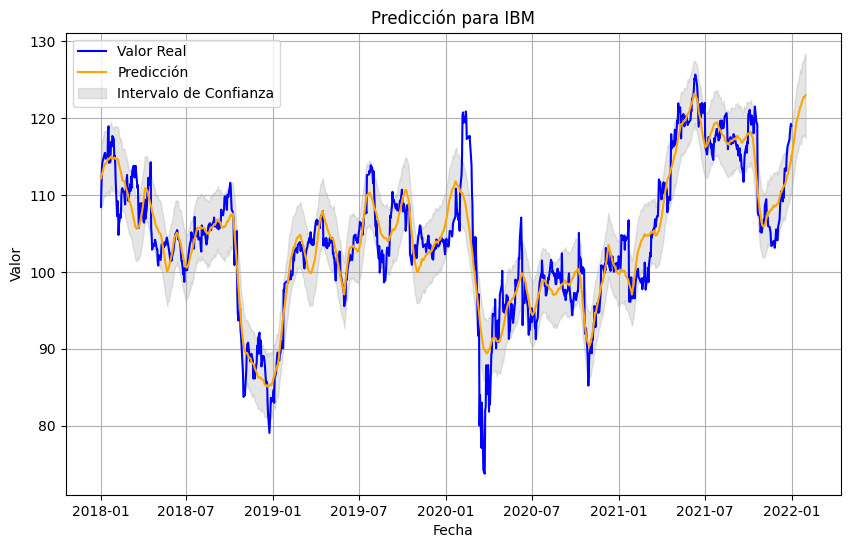

In [6]:
# Función para graficar el pronóstico junto con los valores reales
def plot_forecast(ts_data, ts_forecast):
    unique_ids = ts_forecast['unique_id'].unique()
    
    for unique_id in unique_ids:
        forecast_data = ts_forecast[ts_forecast['unique_id'] == unique_id]
        actual_data = ts_data[ts_data['unique_id'] == unique_id]
        
        plt.figure(figsize=(10, 6))
        
        # Graficar los valores reales
        plt.plot(actual_data['ds'], actual_data['y'], label='Valor Real', color='blue')
        
        # Graficar las predicciones
        plt.plot(forecast_data['ds'], forecast_data['yhat'], label='Predicción', color='orange')
        
        # Rellenar el intervalo de confianza
        plt.fill_between(forecast_data['ds'], forecast_data['yhat_lower'], forecast_data['yhat_upper'], 
                         color='gray', alpha=0.2, label='Intervalo de Confianza')
        
        plt.title(f'Predicción para {unique_id}')
        plt.xlabel('Fecha')
        plt.ylabel('Valor')
        plt.legend()
        plt.grid(True)
        plt.show()
        
plot_forecast(ts, ts_forecast)